In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Pupil Diameter
#data2load = pd.read_csv('/Users/dhewitt/Data/pps/Exports/Combined_PupilDiameter_noav.csv')

## Gaze Direction
data2load = pd.read_csv('/Users/dhewitt/Data/pps/Exports/Combined_GazeDirection_noav.csv')

## Gaze Object / Fixation
#data2load = pd.read_csv('/Users/dhewitt/Data/pps/Exports/Combined_PupilDiameter_noav.csv')

## Hand position
#data2load = pd.read_csv('/Users/dhewitt/Data/pps/Exports/allHandData_2911.csv')


In [286]:
df = pd.DataFrame(data2load)
#df = pd.DataFrame(data2load).drop(['Timepoint','ID'], axis=1)
df=df.rename(columns={'Unnamed: 0':'Timepoint', 'Participant':'ID'})
df.head()

,Timepoint,CM1,CL1,CR1,EM1,EL1,ER1,CM2,CL2,CR2,EM2,EL2,ER2,ID
0,0,19.429701,17.719682,19.228992,45.497854,44.320240,43.924592,25.828397,27.766774,27.805035,4.243265,5.514227,9.823628,2
1,1,19.429631,17.711444,19.213309,45.503686,44.305149,43.897817,25.848357,27.797152,27.798953,4.231374,5.423939,9.793601,2
2,2,19.433177,17.705757,19.201303,45.511248,44.290059,43.871043,25.869019,27.826407,27.791686,4.220279,5.332700,9.800210,2
3,3,19.434392,17.699664,19.189151,45.526316,44.275780,43.844269,25.890980,27.845776,27.772838,4.208317,5.243088,9.809880,2
4,4,19.435906,17.694441,19.176509,45.542503,44.269416,43.830387,25.911183,27.859816,27.755458,4.193549,5.153887,9.817857,2


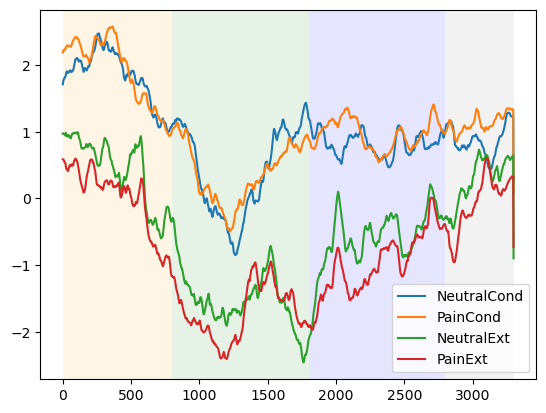

In [288]:
#these need some averaging
avdf = df.groupby(['Timepoint']).mean().drop('ID',axis=1)

avdf['CM'] = avdf[['CM1', 'CM2']].mean(axis=1)
avdf['CR'] = avdf[['CR1', 'CR2']].mean(axis=1)
avdf['CL'] = avdf[['CL1', 'CL2']].mean(axis=1)
avdf['EM'] = avdf[['EM1', 'EM2']].mean(axis=1)
avdf['ER'] = avdf[['ER1', 'ER2']].mean(axis=1)
avdf['EL'] = avdf[['EL1', 'EL2']].mean(axis=1)

newdf = avdf.copy()
newdf['CP'] = newdf[['CL', 'CR']].mean(axis=1)
newdf['EP'] = newdf[['EL', 'ER']].mean(axis=1) ##these can be plotted here

# Plotting the averages for the 'conditioning' blocks
plt.axvspan(0, 800, color='orange', alpha=0.10, lw=0)
plt.axvspan(800, 1800, color='green', alpha=0.10, lw=0)
plt.axvspan(1800, 2800, color='blue', alpha=0.10, lw=0)
plt.axvspan(2800, 3300, color='gray', alpha=0.10, lw=0)

plt.plot(newdf['CM'],label="NeutralCond")
plt.plot(newdf['CP'],label="PainCond")
plt.plot(newdf['EM'],label="NeutralExt")
plt.plot(newdf['EP'],label="PainExt")

plt.legend(loc='lower right')
plt.show()

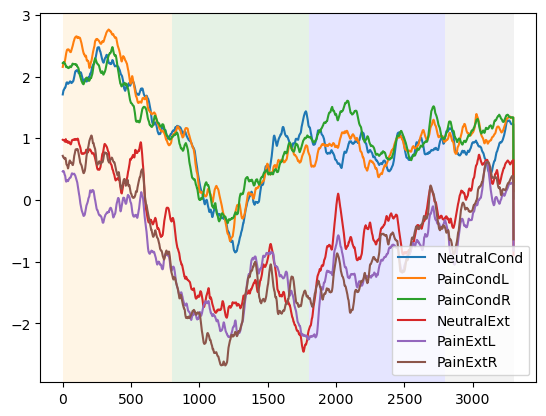

In [292]:
# Or for each side individually (if it's directional)
# Plotting the averages for the 'conditioning' blocks
plt.axvspan(0, 800, color='orange', alpha=0.10, lw=0)
plt.axvspan(800, 1800, color='green', alpha=0.10, lw=0)
plt.axvspan(1800, 2800, color='blue', alpha=0.10, lw=0)
plt.axvspan(2800, 3300, color='gray', alpha=0.10, lw=0)

plt.plot(newdf['CM'],label="NeutralCond")
plt.plot(newdf['CL'],label="PainCondL")
plt.plot(newdf['CR'],label="PainCondR")
plt.plot(newdf['EM'],label="NeutralExt")
plt.plot(newdf['EL'],label="PainExtL")
plt.plot(newdf['ER'],label="PainExtR")

plt.legend(loc='lower right')
plt.show()

In [293]:
conditions = [
    (df['Timepoint'] >= 0) & (df['Timepoint'] < 800),
    (df['Timepoint'] >= 800) & (df['Timepoint'] < 1800),
    (df['Timepoint'] >= 1800) & (df['Timepoint'] < 2800),
    (df['Timepoint'] >= 2800) & (df['Timepoint'] < 3300)
]
values = [1, 2, 3, 4]  # Corresponding values for each condition

# Create the 'phase' column based on conditions and values
df['Phase'] = np.select(conditions, values, default=9)  # Use default value for unmatched conditions

# Display the updated DataFrame
df

,Timepoint,CM1,CL1,CR1,EM1,EL1,ER1,CM2,CL2,CR2,EM2,EL2,ER2,ID,Phase
0,0,19.429701,17.719682,19.228992,45.497854,44.320240,43.924592,25.828397,27.766774,27.805035,4.243265,5.514227,9.823628,2,1
1,1,19.429631,17.711444,19.213309,45.503686,44.305149,43.897817,25.848357,27.797152,27.798953,4.231374,5.423939,9.793601,2,1
2,2,19.433177,17.705757,19.201303,45.511248,44.290059,43.871043,25.869019,27.826407,27.791686,4.220279,5.332700,9.800210,2,1
3,3,19.434392,17.699664,19.189151,45.526316,44.275780,43.844269,25.890980,27.845776,27.772838,4.208317,5.243088,9.809880,2,1
4,4,19.435906,17.694441,19.176509,45.542503,44.269416,43.830387,25.911183,27.859816,27.755458,4.193549,5.153887,9.817857,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85795,3295,-7.794274,-7.881376,-6.738769,-0.394185,0.884374,-1.689911,-0.664013,-0.462682,-1.365326,5.528132,5.489349,8.422852,30,4
85796,3296,-7.794274,-7.881376,-6.738769,-0.394185,0.884374,-1.689911,-0.662910,-0.461578,-1.363118,5.528132,5.489349,8.422852,30,4
85797,3297,-7.794274,-7.881376,-6.738769,-0.394185,0.884374,-1.689911,-0.662910,-0.461578,-1.363118,5.528132,5.489349,8.422852,30,4
85798,3298,-4.056719,-4.325019,-3.685421,-0.149833,0.329124,-0.007417,0.122494,0.299666,0.396729,3.588994,2.563477,5.204519,30,4


In [294]:
## Change these values

## Pupil Diameter
#df.to_csv('/Users/dhewitt/Data/pps/Exports/GrandAvExport_PupilDiameter_noav.csv')

## Gaze Direction
#df.to_csv('/Users/dhewitt/Data/pps/Exports/GrandAvExport_GazeDir_noav.csv')

## Gaze Object / Fixation
#df.to_csv('/Users/dhewitt/Data/pps/Exports/GrandAvExport_PupilDiameter_noav.csv')

## Hand Position
#df.to_csv('/Users/dhewitt/Data/pps/Exports/GrandAvExport_PupilDiameter_noav.csv')


In [295]:
list(df.columns)
df

,Timepoint,CM1,CL1,CR1,EM1,EL1,ER1,CM2,CL2,CR2,EM2,EL2,ER2,ID,Phase
0,0,19.429701,17.719682,19.228992,45.497854,44.320240,43.924592,25.828397,27.766774,27.805035,4.243265,5.514227,9.823628,2,1
1,1,19.429631,17.711444,19.213309,45.503686,44.305149,43.897817,25.848357,27.797152,27.798953,4.231374,5.423939,9.793601,2,1
2,2,19.433177,17.705757,19.201303,45.511248,44.290059,43.871043,25.869019,27.826407,27.791686,4.220279,5.332700,9.800210,2,1
3,3,19.434392,17.699664,19.189151,45.526316,44.275780,43.844269,25.890980,27.845776,27.772838,4.208317,5.243088,9.809880,2,1
4,4,19.435906,17.694441,19.176509,45.542503,44.269416,43.830387,25.911183,27.859816,27.755458,4.193549,5.153887,9.817857,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85795,3295,-7.794274,-7.881376,-6.738769,-0.394185,0.884374,-1.689911,-0.664013,-0.462682,-1.365326,5.528132,5.489349,8.422852,30,4
85796,3296,-7.794274,-7.881376,-6.738769,-0.394185,0.884374,-1.689911,-0.662910,-0.461578,-1.363118,5.528132,5.489349,8.422852,30,4
85797,3297,-7.794274,-7.881376,-6.738769,-0.394185,0.884374,-1.689911,-0.662910,-0.461578,-1.363118,5.528132,5.489349,8.422852,30,4
85798,3298,-4.056719,-4.325019,-3.685421,-0.149833,0.329124,-0.007417,0.122494,0.299666,0.396729,3.588994,2.563477,5.204519,30,4


# Making the long format export

In [300]:
melted_df = pd.melt(df, id_vars = ['Timepoint','Phase','ID'], value_vars=['CM1', 'CL1', 'CR1', 'EM1', 'EL1', 'ER1', 'CM2', 'CL2', 'CR2', 'EM2', 'EL2', 'ER2'])
melted_df[['Condition', 'Side', 'Rep']] = melted_df['variable'].str.extract(r'([CEMLR])([CEMLR])([12])')
melted_df = melted_df.drop(columns=['variable'])
melted_df.rename({'value':'Direction'}, axis=1, inplace=True)
melted_df

,Timepoint,Phase,ID,Direction,Condition,Side,Rep
0,0,1,2,19.429701,C,M,1
1,1,1,2,19.429631,C,M,1
2,2,1,2,19.433177,C,M,1
3,3,1,2,19.434392,C,M,1
4,4,1,2,19.435906,C,M,1
...,...,...,...,...,...,...,...
1029595,3295,4,30,8.422852,E,R,2
1029596,3296,4,30,8.422852,E,R,2
1029597,3297,4,30,8.422852,E,R,2
1029598,3298,4,30,5.204519,E,R,2


In [301]:
####### Change this for the data

#melted_df.to_csv('/Users/dhewitt/Data/pps/Exports/GrandAvExport_PupilDiameterLong_noav.csv', index=False)
#grandavdfL.to_csv('/Users/dhewitt/Data/pps/Exports/GrandAvExport_GazeDirLong.csv', index=False)

In [302]:
melted_df = melted_df.reset_index()
melted_df = melted_df.replace({'C':'1', 'E':'2','M':'0','L':'1','R':'2'})
melted_df


,index,Timepoint,Phase,ID,Direction,Condition,Side,Rep
0,0,0,1,2,19.429701,1,0,1
1,1,1,1,2,19.429631,1,0,1
2,2,2,1,2,19.433177,1,0,1
3,3,3,1,2,19.434392,1,0,1
4,4,4,1,2,19.435906,1,0,1
...,...,...,...,...,...,...,...,...
1029595,1029595,3295,4,30,8.422852,2,2,2
1029596,1029596,3296,4,30,8.422852,2,2,2
1029597,1029597,3297,4,30,8.422852,2,2,2
1029598,1029598,3298,4,30,5.204519,2,2,2


In [303]:
# Averaging for each phase
average_df = melted_df.groupby(['ID', 'Phase', 'Side', 'Rep', 'Condition']).mean().reset_index()
average_df.drop(['Timepoint','index'],axis=1, inplace=True)
average_df

,ID,Phase,Side,Rep,Condition,Direction
0,2,1,0,1,1,17.803805
1,2,1,0,1,2,37.919285
2,2,1,0,2,1,21.085948
3,2,1,0,2,2,7.242262
4,2,1,1,1,1,16.254906
...,...,...,...,...,...,...
1243,30,4,1,2,2,6.316690
1244,30,4,2,1,1,-8.136678
1245,30,4,2,1,2,-1.698898
1246,30,4,2,2,1,-0.079731


In [304]:
######## Change these for the input data

## Pupil Diameter
#melted_df.to_csv('/Users/dhewitt/Data/pps/Exports/GrandAvExport_PupilDiameterLong_Recoded_noav.csv', index=False)
#average_df.to_csv('/Users/dhewitt/Data/pps/Exports/GrandAvExport_PupilDiameterLong_Recoded_phaseav.csv', index=False)

## Gaze Direction
melted_df.to_csv('/Users/dhewitt/Data/pps/Exports/GrandAvExport_GazeDirLong_Recoded_noav.csv', index=False)
average_df.to_csv('/Users/dhewitt/Data/pps/Exports/GrandAvExport_GazeDirLong_Recoded_phaseav.csv', index=False)

## Gaze Object
#melted_df.to_csv('/Users/dhewitt/Data/pps/Exports/GrandAvExport_GazeObjLong_Recoded_noav.csv', index=False)
#average_df.to_csv('/Users/dhewitt/Data/pps/Exports/GrandAvExport_GazeObjLong_Recoded_phaseav.csv', index=False)

## Hand position
#melted_df.to_csv('/Users/dhewitt/Data/pps/Exports/GrandAvExport_HandPosLong_Recoded_noav.csv', index=False)
#average_df.to_csv('/Users/dhewitt/Data/pps/Exports/GrandAvExport_HandPosLong_Recoded_phaseav.csv', index=False)


# Extinction sides data

In [469]:
## Pupil Diameter
#data2load = pd.read_csv('/Users/dhewitt/Data/pps/Exports/Combined_PupilDiameterExt.csv')

## Gaze Direction
data2load = pd.read_csv('/Users/dhewitt/Data/pps/Exports/Combined_GazeDirectionExt.csv')

## Gaze Object / Fixation
#data2load = pd.read_csv('/Users/dhewitt/Data/pps/Exports/Combined_.csv')

## Hand position
#data2load = pd.read_csv('/Users/dhewitt/Data/pps/Exports/Combined_.csv')


In [470]:
dfext = pd.DataFrame(data2load)
dfext=dfext.rename(columns={'Unnamed: 0':'Timepoint', 'Participant':'ID'})

data2load = pd.read_csv('/Users/dhewitt/Data/pps/tonicpainsides.csv')
sidesdf = pd.DataFrame(data2load)
dfext=dfext.join(sidesdf.set_index('ID'), on='ID')
dfext.head()


,Timepoint,EM1,EL1,ER1,EM2,EL2,ER2,ID,B1,B2
0,0,45.497854,44.320240,43.924592,4.243265,5.514227,9.823628,2,2,1
1,1,45.503686,44.305149,43.897817,4.231374,5.423939,9.793601,2,2,1
2,2,45.511248,44.290059,43.871043,4.220279,5.332700,9.800210,2,2,1
3,3,45.526316,44.275780,43.844269,4.208317,5.243088,9.809880,2,2,1
4,4,45.542503,44.269416,43.830387,4.193549,5.153887,9.817857,2,2,1


In [471]:
#### If it's directional - gaze direction

df = dfext.copy()

conditions = [
    (df['Timepoint'] >= 0) & (df['Timepoint'] < 800),
    (df['Timepoint'] >= 800) & (df['Timepoint'] < 1800),
    (df['Timepoint'] >= 1800) & (df['Timepoint'] < 2800),
    (df['Timepoint'] >= 2800) & (df['Timepoint'] < 3300)
]
values = [1, 2, 3, 4]  # Corresponding values for each condition

df['Phase'] = np.select(conditions, values, default=9)  # Use default value for unmatched conditions

melted_df = pd.melt(df, id_vars = ['Timepoint','B1','Phase','ID'], value_vars=['EM1', 'EL1', 'ER1', 'EM2', 'EL2', 'ER2'])
melted_df[['Condition', 'Side', 'Rep']] = melted_df['variable'].str.extract(r'([CEMLR])([CEMLR])([12])')
melted_df


,Timepoint,B1,Phase,ID,variable,value,Condition,Side,Rep
0,0,2,1,2,EM1,45.497854,E,M,1
1,1,2,1,2,EM1,45.503686,E,M,1
2,2,2,1,2,EM1,45.511248,E,M,1
3,3,2,1,2,EM1,45.526316,E,M,1
4,4,2,1,2,EM1,45.542503,E,M,1
...,...,...,...,...,...,...,...,...,...
514795,3295,1,4,30,ER2,8.422852,E,R,2
514796,3296,1,4,30,ER2,8.422852,E,R,2
514797,3297,1,4,30,ER2,8.422852,E,R,2
514798,3298,1,4,30,ER2,5.204519,E,R,2


In [472]:

cong = melted_df.loc[(melted_df['Rep'].astype(int)==1) & (melted_df['B1'].astype(int)==1) & 
                     (melted_df['Side']=='L') |
                     (melted_df['Rep'].astype(int)==1) & (melted_df['B1'].astype(int)==2) & 
                     (melted_df['Side']=='R') |
                     (melted_df['Rep'].astype(int)==2) & (melted_df['B1'].astype(int)==1) & 
                     (melted_df['Side']=='R') |
                     (melted_df['Rep'].astype(int)==2) & (melted_df['B1'].astype(int)==2) & 
                     (melted_df['Side']=='L')]
cong['congruency'] = 2

incong = melted_df.loc[(melted_df['Rep'].astype(int)==1) & (melted_df['B1'].astype(int)==1) & 
                     (melted_df['Side']=='R') |
                     (melted_df['Rep'].astype(int)==1) & (melted_df['B1'].astype(int)==2) & 
                     (melted_df['Side']=='L') |
                     (melted_df['Rep'].astype(int)==2) & (melted_df['B1'].astype(int)==1) & 
                     (melted_df['Side']=='L') |
                     (melted_df['Rep'].astype(int)==2) & (melted_df['B1'].astype(int)==2) & 
                     (melted_df['Side']=='R')]
incong['congruency'] = 1

neutral = melted_df.loc[(melted_df['Side']=='M')]
neutral['congruency'] = 0

joineddf=pd.concat([neutral,cong,incong])
joineddf

/var/folders/m9/8l65rzcd5x5903xt73lz9ln00000gn/T/ipykernel_57883/3686659063.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cong['congruency'] = 2
/var/folders/m9/8l65rzcd5x5903xt73lz9ln00000gn/T/ipykernel_57883/3686659063.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incong['congruency'] = 1
/var/folders/m9/8l65rzcd5x5903xt73lz9ln00000gn/T/ipykernel_57883/3686659063.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

,Timepoint,B1,Phase,ID,variable,value,Condition,Side,Rep,congruency
0,0,2,1,2,EM1,45.497854,E,M,1,0
1,1,2,1,2,EM1,45.503686,E,M,1,0
2,2,2,1,2,EM1,45.511248,E,M,1,0
3,3,2,1,2,EM1,45.526316,E,M,1,0
4,4,2,1,2,EM1,45.542503,E,M,1,0
...,...,...,...,...,...,...,...,...,...,...
508195,3295,2,4,28,ER2,1.345952,E,R,2,1
508196,3296,2,4,28,ER2,1.345952,E,R,2,1
508197,3297,2,4,28,ER2,1.345952,E,R,2,1
508198,3298,2,4,28,ER2,1.014074,E,R,2,1


In [473]:

joineddf.drop(columns=['variable','B1'],inplace = True)
joineddf.rename({'value':'Direction'}, axis=1, inplace=True)
joineddf

,Timepoint,Phase,ID,Direction,Condition,Side,Rep,congruency
0,0,1,2,45.497854,E,M,1,0
1,1,1,2,45.503686,E,M,1,0
2,2,1,2,45.511248,E,M,1,0
3,3,1,2,45.526316,E,M,1,0
4,4,1,2,45.542503,E,M,1,0
...,...,...,...,...,...,...,...,...
508195,3295,4,28,1.345952,E,R,2,1
508196,3296,4,28,1.345952,E,R,2,1
508197,3297,4,28,1.345952,E,R,2,1
508198,3298,4,28,1.014074,E,R,2,1


In [474]:
joineddf = joineddf.reset_index()
joineddf = joineddf.replace({'M':'0','L':'1','R':'2'})

# Averaging for each phase
average_df = joineddf.groupby(['ID', 'Phase', 'Side', 'Rep','congruency']).mean().reset_index()
average_df.drop(['Timepoint','index'],axis=1, inplace=True)

average_df




,ID,Phase,Side,Rep,congruency,Direction
0,2,1,0,1,0,37.919285
1,2,1,0,2,0,7.242262
2,2,1,1,1,1,38.752618
3,2,1,1,2,2,5.984297
4,2,1,2,1,2,38.365811
...,...,...,...,...,...,...
619,30,4,0,2,0,6.656054
620,30,4,1,1,2,-0.899401
621,30,4,1,2,1,6.316690
622,30,4,2,1,1,-1.698898


In [475]:

######## Change these for the input data

## Pupil Diameter
#melted_df.to_csv('/Users/dhewitt/Data/pps/Exports/GrandAvExport_PupilDiameterExtLong_Recoded_noav.csv', index=False)
#average_df.to_csv('/Users/dhewitt/Data/pps/Exports/GrandAvExport_PupilDiameterExtLong_Recoded_phaseav.csv', index=False)

## Gaze Direction
joineddf.to_csv('/Users/dhewitt/Data/pps/Exports/GrandAvExport_GazeDirExtLong_Recoded_noav.csv', index=False)
average_df.to_csv('/Users/dhewitt/Data/pps/Exports/GrandAvExport_GazeDirExtLong_Recoded_phaseav.csv', index=False)

## Gaze Object
#melted_df.to_csv('/Users/dhewitt/Data/pps/Exports/GrandAvExport_GazeObjExtLong_Recoded_noav.csv', index=False)
#average_df.to_csv('/Users/dhewitt/Data/pps/Exports/GrandAvExport_GazeObjExtLong_Recoded_phaseav.csv', index=False)

## Hand position
#melted_df.to_csv('/Users/dhewitt/Data/pps/Exports/GrandAvExport_HandPosExtLong_Recoded_noav.csv', index=False)
#average_df.to_csv('/Users/dhewitt/Data/pps/Exports/GrandAvExport_HandPosExtLong_Recoded_phaseav.csv', index=False)


In [442]:
average_df

,ID,Phase,Side,Rep,congruency,Direction
0,2,1,L,1,1,38.752618
1,2,1,L,2,2,5.984297
2,2,1,M,1,0,37.919285
3,2,1,M,2,0,7.242262
4,2,1,R,1,2,38.365811
...,...,...,...,...,...,...
619,30,4,L,2,1,6.316690
620,30,4,M,1,0,0.603618
621,30,4,M,2,0,6.656054
622,30,4,R,1,1,-1.698898


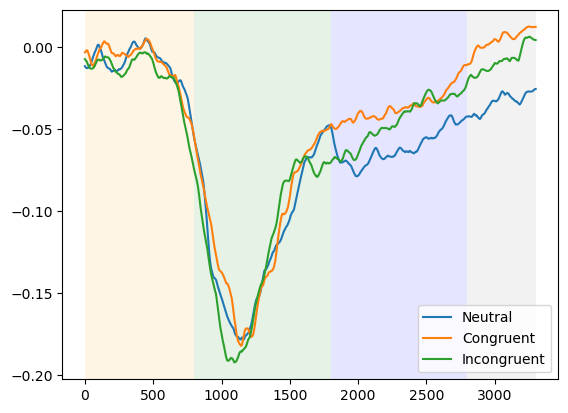

In [264]:
# Plotting the averages for the 'conditioning' blocks
avdfext = dfext.groupby(['Timepoint']).mean().drop('ID',axis=1)

avdfext['neutral'] = avdfext[['neutral1', 'neutral2']].mean(axis=1)
avdfext['congruent'] = avdfext[['congruent1', 'congruent2']].mean(axis=1)
avdfext['incongruent'] = avdfext[['incongruent1', 'incongruent2']].mean(axis=1)

plt.axvspan(0, 800, color='orange', alpha=0.10, lw=0)
plt.axvspan(800, 1800, color='green', alpha=0.10, lw=0)
plt.axvspan(1800, 2800, color='blue', alpha=0.10, lw=0)
plt.axvspan(2800, 3300, color='gray', alpha=0.10, lw=0)

plt.plot(avdfext['neutral'],label='Neutral')
plt.plot(avdfext['congruent'],label="Congruent")
plt.plot(avdfext['incongruent'],label="Incongruent")

#ax = plt.gca()
#ax.set_ylim([-3, 3])

plt.legend(loc='lower right')
plt.show()

In [308]:
dfext

,Timepoint,EM1,EL1,ER1,EM2,EL2,ER2,ID,B1,B2,Lcongruent1
0,0,45.497854,44.320240,43.924592,4.243265,5.514227,9.823628,2,2,1,NaN
1,1,45.503686,44.305149,43.897817,4.231374,5.423939,9.793601,2,2,1,NaN
2,2,45.511248,44.290059,43.871043,4.220279,5.332700,9.800210,2,2,1,NaN
3,3,45.526316,44.275780,43.844269,4.208317,5.243088,9.809880,2,2,1,NaN
4,4,45.542503,44.269416,43.830387,4.193549,5.153887,9.817857,2,2,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
85795,3295,-0.394185,0.884374,-1.689911,5.528132,5.489349,8.422852,30,1,2,0.884374
85796,3296,-0.394185,0.884374,-1.689911,5.528132,5.489349,8.422852,30,1,2,0.884374
85797,3297,-0.394185,0.884374,-1.689911,5.528132,5.489349,8.422852,30,1,2,0.884374
85798,3298,-0.149833,0.329124,-0.007417,3.588994,2.563477,5.204519,30,1,2,0.329124


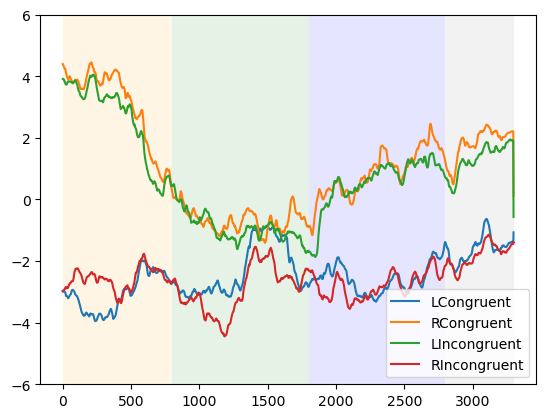

In [54]:
# Plotting the averages for the 'conditioning' blocks
avdfext = dfext.groupby(['Timepoint']).mean().drop('ID',axis=1)

plt.axvspan(0, 800, color='orange', alpha=0.10, lw=0)
#plt.axvspan(800, 2800, color='green', alpha=0.10, lw=0)
#plt.axvspan(2800, 3300, color='gray', alpha=0.10, lw=0)
plt.axvspan(800, 1800, color='green', alpha=0.10, lw=0)
plt.axvspan(1800, 2800, color='blue', alpha=0.10, lw=0)
plt.axvspan(2800, 3300, color='gray', alpha=0.10, lw=0)

ax = plt.gca()
ax.set_ylim([-6, 6])

plt.plot(avdfext['Lcongruent'],label="LCongruent")
plt.plot(avdfext['Rcongruent'],label="RCongruent")
plt.plot(avdfext['Lincongruent'],label="LIncongruent")
plt.plot(avdfext['Rincongruent'],label="RIncongruent")

plt.legend(loc='lower right')
plt.show()

In [55]:
cuedf = dfext.loc[dfext['Timepoint'].between(0,799)].groupby('ID').mean()
cuedf = cuedf.add_suffix('_cue').drop('Timepoint_cue',axis=1)

waitdf1 = dfext.loc[dfext['Timepoint'].between(800,1799)].groupby('ID').mean()
waitdf1 = waitdf1.add_suffix('_wait1').drop('Timepoint_wait1',axis=1)

waitdf2 = dfext.loc[dfext['Timepoint'].between(1800,2799)].groupby('ID').mean()
waitdf2 = waitdf2.add_suffix('_wait2').drop('Timepoint_wait2',axis=1)

rockdf = dfext.loc[dfext['Timepoint'].between(2800,3299)].groupby('ID').mean()
rockdf = rockdf.add_suffix('_rock').drop('Timepoint_rock',axis=1)

grandavdf = pd.concat([cuedf, waitdf1, waitdf2, rockdf],axis=1)

In [56]:
grandavdf

,Lcongruent_cue,Rcongruent_cue,Lincongruent_cue,Rincongruent_cue,Lcongruent_wait1,Rcongruent_wait1,Lincongruent_wait1,Rincongruent_wait1,Lcongruent_wait2,Rcongruent_wait2,Lincongruent_wait2,Rincongruent_wait2,Lcongruent_rock,Rcongruent_rock,Lincongruent_rock,Rincongruent_rock
ID,,,,,,,,,,,,,,,,
2,5.984297,38.365811,38.752618,10.158249,7.362086,25.673444,27.489831,7.883794,8.206738,29.100531,26.741356,8.141231,9.554440,27.746121,28.331461,9.578491
3,-10.859345,-11.655236,-11.218473,-8.058453,-8.444334,-7.632274,-8.881194,-8.188662,-6.420610,-5.903123,-7.150728,-7.315865,-8.632225,-7.187295,-9.657731,-7.881783
4,-3.879907,3.175902,4.042920,-5.498105,0.971800,2.635151,3.003481,-0.888003,-2.551602,2.654136,1.624505,-3.706827,-4.184959,1.604003,1.378724,-4.764610
5,1.615837,4.040924,0.983005,7.078212,10.309822,-6.457350,-1.629354,7.595471,12.509432,-6.521632,-1.932430,10.426625,12.842844,0.194119,0.942781,10.085495
6,4.277252,0.160969,-0.209869,4.869845,5.063093,1.771530,2.372761,4.200980,4.422986,1.506632,1.464833,6.207647,4.049475,-1.982790,1.110976,4.794673
8,-30.742450,6.512346,8.156102,-22.544306,-20.314753,8.099555,9.810444,-19.045039,-24.137755,12.781852,15.940204,-25.188956,-26.874990,13.130230,14.002025,-26.914748
9,-20.759431,6.379504,6.258160,-21.051254,-24.516264,-0.700937,-1.240604,-24.408693,-21.289732,1.276617,-1.495960,-21.505522,-20.112832,0.407088,-2.291586,-19.972595
10,28.435260,35.780489,33.157976,29.396206,27.409985,26.449219,24.265269,25.540726,28.488113,28.144297,27.019514,26.626238,26.864488,23.999206,25.957404,24.231856
11,26.250836,12.697383,12.337700,23.743950,25.937887,12.905488,10.178997,23.792717,26.593254,13.833239,12.359317,24.417663,24.676130,16.598721,14.594305,23.252534


In [59]:
## Saving this for later

#grandavdf.to_csv('/Users/dhewitt/Data/pps/Exports/GrandAvExport_PupilDiameterExt.csv')
grandavdf.to_csv('/Users/dhewitt/Data/pps/Exports/GrandAvExport_GazeDir_Extinctionsides.csv')

# Making it long format

In [60]:
grandavdfL = grandavdf.melt(ignore_index=False)

grandavdfL.rename({'variable':'Condition', 'value':'Diameter'}, axis=1, inplace=True)

grandavdfL[['Condition', 'Phase']] = grandavdfL["Condition"].apply(lambda x: pd.Series(str(x).split("_")))

## Saving this for later

grandavdfL.to_csv('/Users/dhewitt/Data/pps/Exports/GrandAvExport_GazeDir_ExtinctionsidesLong.csv')
#grandavdfL.to_csv('/Users/dhewitt/Data/pps/Exports/GrandAvExport_PupilDiameter_ExtinctionsidesLong.csv')